In [173]:
#https://www.kaggle.com/aurghyadip/eda-of-rape-crimes-in-india
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew

# configure matplotlib to output inline
%matplotlib inline


In [174]:
sourcedata=pd.read_csv('Crime_Victims_of_rape.csv')
sourcedata.head(100)

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,Assam,2002,Victims of Other Rape,960,0,0,3,616,341,960,0
96,Assam,2003,Total Rape Victims,1095,3,5,0,827,260,1095,0
97,Assam,2003,Victims of Incest Rape,19,0,0,0,19,0,19,0
98,Assam,2003,Victims of Other Rape,1076,3,5,0,808,260,1076,0


# Predicting Crimes-in-india

In [175]:
sourcedata=pd.DataFrame(sourcedata)
sourcedata.dtypes

Area_Name                    object
Year                          int64
Subgroup                     object
Rape_Cases_Reported           int64
Victims_Above_50_Yrs          int64
Victims_Between_10-14_Yrs     int64
Victims_Between_14-18_Yrs     int64
Victims_Between_18-30_Yrs     int64
Victims_Between_30-50_Yrs     int64
Victims_of_Rape_Total         int64
Victims_Upto_10_Yrs           int64
dtype: object

In [176]:
sourcedata.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [177]:
# let's clean the data a bit
# we don't need the Total Rape Victims subgroup (we can do that in Pandas), let's remove it
rape_victims = sourcedata[sourcedata['Subgroup'] != 'Total Rape Victims']

# let's check if the all the rape cases are reported
rape_victims[rape_victims['Victims_of_Rape_Total'] != rape_victims['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


In [178]:
rape_victims['Unreported_Cases'] = rape_victims['Victims_of_Rape_Total'] - rape_victims['Rape_Cases_Reported']

# let's taka a look at the new dataframe
rape_victims[rape_victims['Unreported_Cases'] > 0].head()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


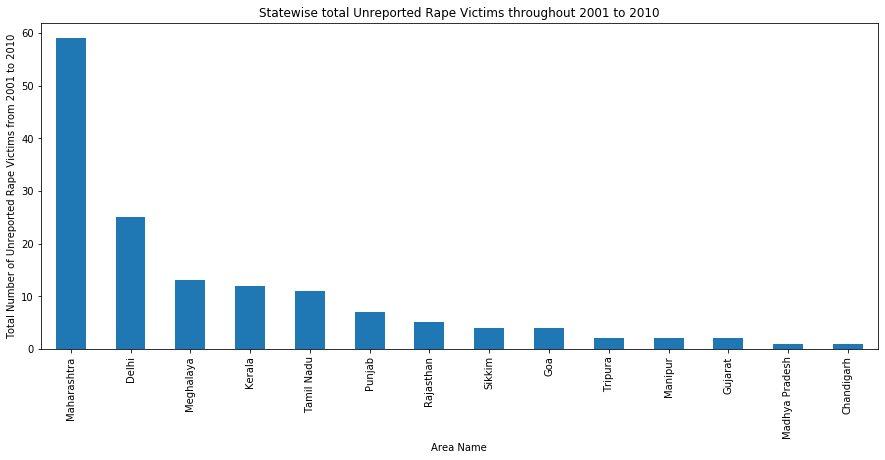

In [179]:
# let's plot the unreported rape cases sorted by states throughout 2001 to 2010
unreported_victims_by_state = rape_victims.groupby('Area_Name').sum()
unreported_victims_by_state.drop('Year', axis = 1, inplace = True)

# let's finally plot it
plt.subplots(figsize = (15, 6))
ct = unreported_victims_by_state[unreported_victims_by_state['Unreported_Cases'] 
                                 > 0]['Unreported_Cases'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()

In [180]:
# let's take some general data and plot some simple charts
rape_victims_by_state = rape_victims.groupby('Area_Name').sum()
rape_victims_by_state.drop('Year', axis = 1, inplace = True)
print('Total Rape Victims = ' ,rape_victims_by_state['Rape_Cases_Reported'].sum())
rape_victims_by_state.sort_values(by = 'Rape_Cases_Reported', ascending = False).head()


Total Rape Victims =  190008


,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
Area_Name,,,,,,,,,
Madhya Pradesh,29256,181,2499,5554,14532,5783,29257,708,1
West Bengal,16378,10,156,273,12586,3290,16378,63,0
Uttar Pradesh,15053,12,1424,3092,8076,2086,15053,363,0
Maharashtra,14446,63,1305,4152,6560,1485,14505,940,59
Assam,12762,95,153,409,8507,3552,12762,46,0


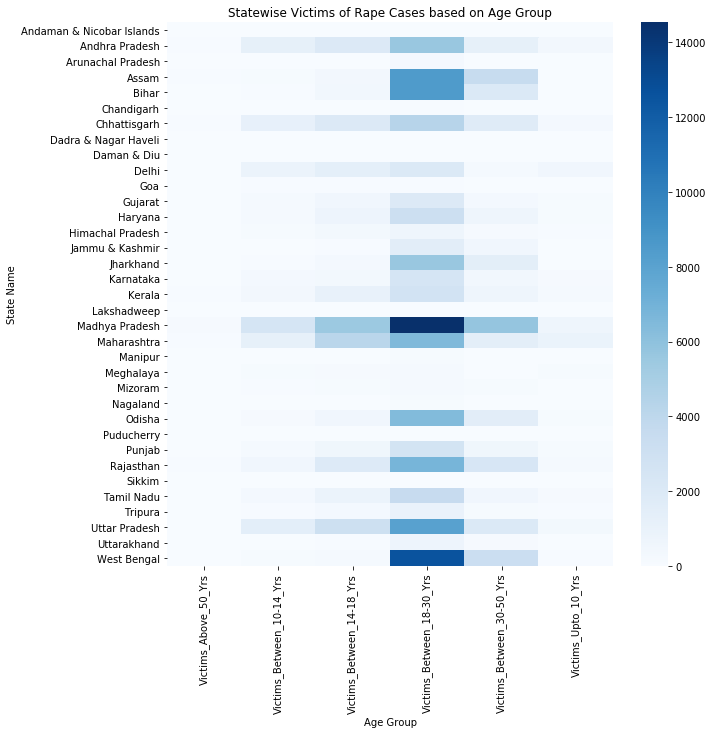

In [181]:
# let's make a heatmap variable
rape_victims_heatmap = rape_victims_by_state.drop(['Rape_Cases_Reported', 
                                                   'Victims_of_Rape_Total', 
                                                   'Unreported_Cases'], axis = 1)
plt.subplots(figsize = (10, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap="Blues")
ax.set_xlabel('Age Group')
ax.set_ylabel('State Name')
ax.set_title('Statewise Victims of Rape Cases based on Age Group')
plt.show()


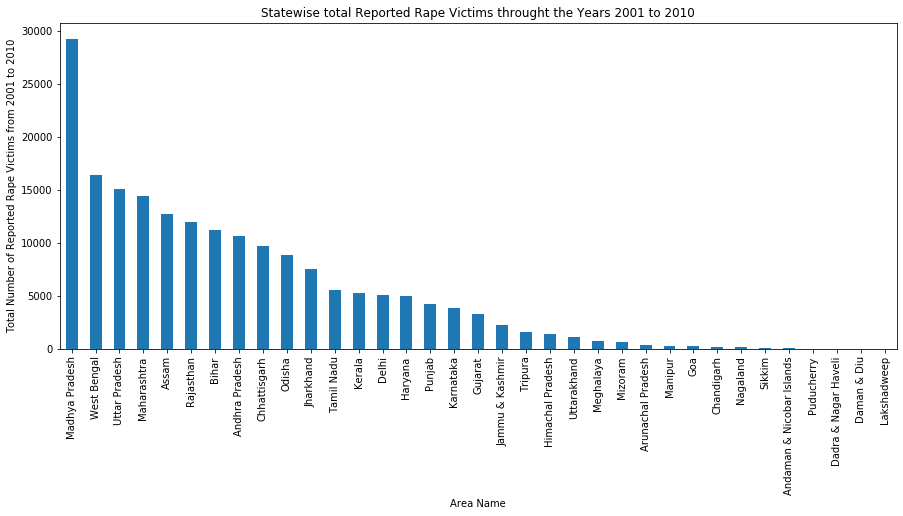

Area_Name
Madhya Pradesh               29256
West Bengal                  16378
Uttar Pradesh                15053
Maharashtra                  14446
Assam                        12762
Rajasthan                    11949
Bihar                        11263
Andhra Pradesh               10696
Chhattisgarh                  9751
Odisha                        8860
Jharkhand                     7563
Tamil Nadu                    5538
Kerala                        5296
Delhi                         5146
Haryana                       5009
Punjab                        4300
Karnataka                     3917
Gujarat                       3337
Jammu & Kashmir               2230
Tripura                       1624
Himachal Pradesh              1453
Uttarakhand                   1101
Meghalaya                      726
Mizoram                        646
Arunachal Pradesh              412
Manipur                        271
Goa                            266
Chandigarh                     227
Nagaland  

In [182]:
# let's first plot only the total number of rape cases reported in each state
plt.subplots(figsize = (15, 6))
ct = rape_victims_by_state['Rape_Cases_Reported'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
#ax = sns.barplot(x = rape_victims_by_state.index, y = rape_victims_by_state['Rape_Cases_Reported'])
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Reported Rape Victims throught the Years 2001 to 2010')
plt.show()
print(ct)

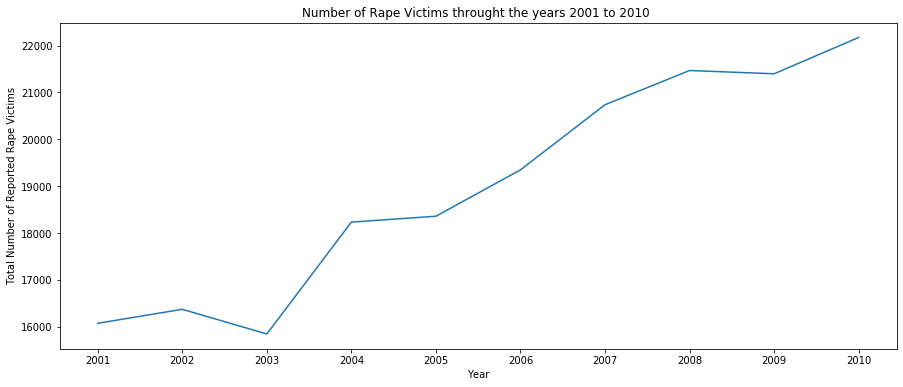

In [183]:
# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
mp_rape_victims_by_year = rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = mp_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims', 
       title = 'Number of Rape Victims throught the years 2001 to 2010 ')
plt.show()

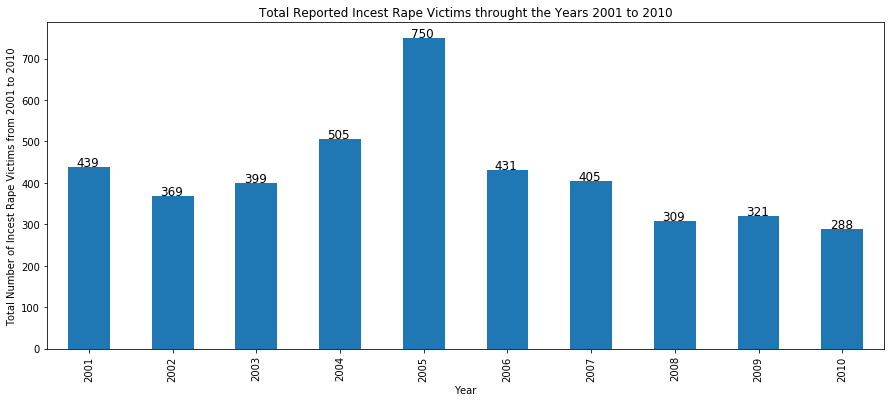

In [184]:
# let's first see the mp_rape_victims dataframe
#mp_rape_victims.head()

# plot the dataframe
mp_incest_rape_cases = rape_victims[rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = mp_incest_rape_cases.groupby('Year').sum()
ax = ct['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims throught the Years 2001 to 2010')
plt.show()

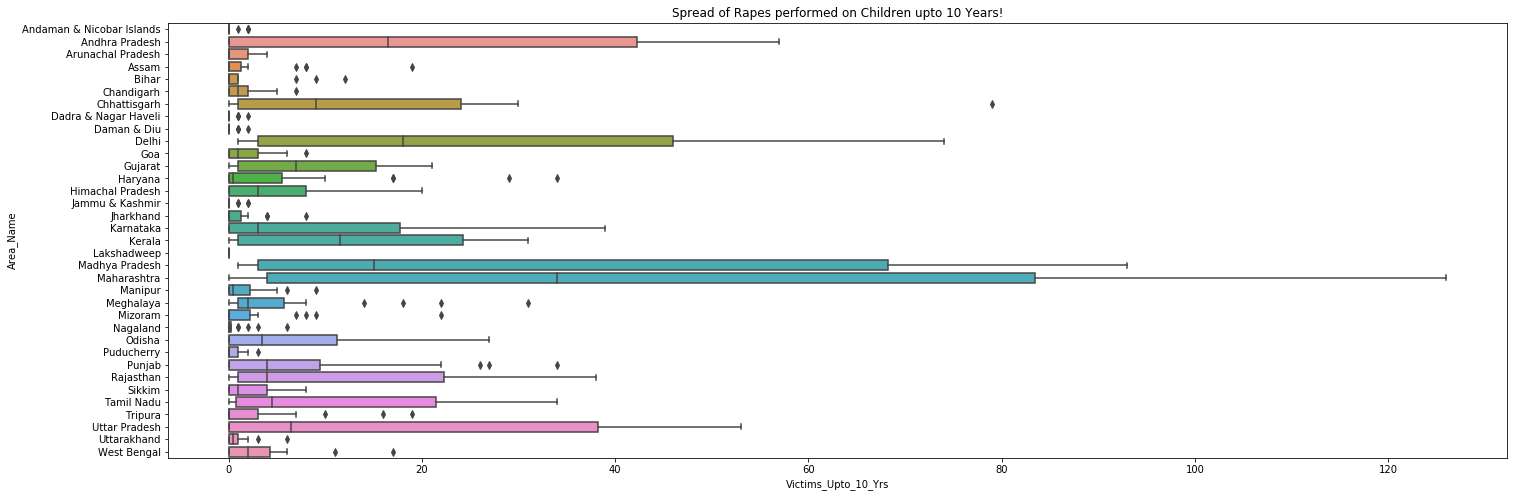

In [185]:
plt.figure(figsize=(24,8))
sns.boxplot(rape_victims['Victims_Upto_10_Yrs'],rape_victims['Area_Name'],data = rape_victims);
plt.title('Spread of Rapes performed on Children upto 10 Years!');

In [186]:

# IQR score technique to remove Outliers 
Q1 = rape_victims.quantile(0.25)
Q3 = rape_victims.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
dfIQR = rape_victims[~((rape_victims < (Q1-1.5 * IQR)) |(rape_victims > (Q3 + 1.5 * IQR))).any(axis=1)]
dfIQR.shape

(10,)


(467, 12)

In [187]:
x=dfIQR[['Year','Rape_Cases_Reported', 'Victims_Above_50_Yrs',
       'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
       'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs']]
x.shape

(467, 7)

In [196]:

y = dfIQR[['Victims_of_Rape_Total']]

print(y.shape)

(467, 1)


In [197]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [199]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [200]:
y_pred = regressor.predict(X_test)

In [201]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

8.235480660662789e-14

In [232]:
# regressor.coef_
coeff_df = pd.DataFrame(regressor.coef_, np.array(x), columns=['Coefficient'])  
coeff_df

ValueError: Index data must be 1-dimensional

In [230]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df.head()

,Actual,Predicted
0,7,7.000000e+00
1,7,7.000000e+00
2,0,2.833467e-14
3,6,6.000000e+00
4,17,1.700000e+01
